# Mass Transports

Transport diagnostics for flow through major straits.

## Theory

Formally, mass transports are given by
$$T_x = \rho u  $$
$$T_y = \rho v  $$

Mass transports are diagnostics that are calculated online by the model:

|variable|long name|units|dimensions|
|-|
|tx_trans|T-cell i-mass transport|Sv|(time,st_ocean,xu_ocean,yt_ocean)|
|ty_trans|T-cell j-mass transport|Sv|(time,st_ocean,xt_ocean,yu_ocean)|


These variables are saved in `ocean.nc` files.

## Calculation

In [2]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats
from dask.distributed import Client

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [3]:
# cc.start_cluster()
client = Client()
client

Client Scheduler: tcp://127.0.0.1:37498 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 8 Memory: 33.67 GB


In [4]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [5]:
input_path_obs = '/g/data/e14/erd561/NOAA_OI_SST_V2/'

input_path_mod = '/g/data/e14/erd561/access-om2/'

In [6]:
sst_LC = xr.open_dataset(input_path_obs + 'sst_LC.nc').sst_LC
print(sst_LC)
sst_1_LC = xr.open_dataset(input_path_mod + 'sst_1_LC.nc').sst_1_LC
print(sst_1_LC)
sst_025_LC = xr.open_dataset(input_path_mod + 'sst_025_LC.nc').sst_025_LC
print(sst_025_LC)
sst_01_LC = xr.open_dataset(input_path_mod + 'sst_01_LC.nc').sst_01_LC
print(sst_01_LC)
sst_JRA_LC = xr.open_dataset(input_path_mod + 'sst_JRA_LC.nc').sst_JRA_LC
print(sst_JRA_LC)

<xarray.DataArray 'sst_LC' (year: 37)>
array([22.463955, 22.9763  , 22.970453, 22.596972, 21.891161, 22.301512,
       23.047176, 23.065908, 22.304474, 22.376787, 22.248499, 21.881594,
       22.770557, 22.843096, 23.089344, 22.668259, 23.096334, 23.584162,
       23.242346, 22.670536, 22.372091, 22.315914, 22.205128, 22.34758 ,
       22.443483, 22.616913, 23.041857, 22.551168, 22.805937, 23.58909 ,
       23.12825 , 23.165182, 22.885855, 22.995302, 22.135845, 22.201862,
       22.041538], dtype=float32)
Coordinates:
  * year     (year) int64 1982 1983 1984 1985 1986 ... 2014 2015 2016 2017 2018
<xarray.DataArray 'sst_1_LC' (year: 300)>
array([22.286255, 22.00528 , 21.520203, ..., 22.318146, 21.884735, 21.873077],
      dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'sst_025_LC' (year: 300)>
array([21.920685, 21.85968 , 21.236267, ..., 22.014923, 21.562256, 21.592651],
      dtype=float32)
Coordinates:
  * 

In [7]:
trans_Lombok_1 = xr.open_dataset(input_path_mod + 'trans_Lombok_1.nc').trans_Lombok_1/1e6/1036
print(trans_Lombok_1)
trans_Lombok_025 = xr.open_dataset(input_path_mod + 'trans_Lombok_025.nc').trans_Lombok_025/1e6/1036
print(trans_Lombok_025)
trans_Lombok_01 = xr.open_dataset(input_path_mod + 'trans_Lombok_01.nc').trans_Lombok_01/1e6/1036
print(trans_Lombok_01)
trans_Lombok_JRA = xr.open_dataset(input_path_mod + 'trans_Lombok_JRA.nc').trans_Lombok_JRA/1e6/1036
print(trans_Lombok_JRA)

trans_Ombai_1 = xr.open_dataset(input_path_mod + 'trans_Ombai_1.nc').trans_Ombai_1/1e6/1036
print(trans_Ombai_1)
trans_Ombai_025 = xr.open_dataset(input_path_mod + 'trans_Ombai_025.nc').trans_Ombai_025/1e6/1036
print(trans_Ombai_025)
trans_Ombai_01 = xr.open_dataset(input_path_mod + 'trans_Ombai_01.nc').trans_Ombai_01/1e6/1036
print(trans_Ombai_01)
trans_Ombai_JRA = xr.open_dataset(input_path_mod + 'trans_Ombai_JRA.nc').trans_Ombai_JRA/1e6/1036
print(trans_Ombai_JRA)

trans_Timor_1 = xr.open_dataset(input_path_mod + 'trans_Timor_1.nc').trans_Timor_1/1e6/1036
print(trans_Timor_1)
trans_Timor_025 = xr.open_dataset(input_path_mod + 'trans_Timor_025.nc').trans_Timor_025/1e6/1036
print(trans_Timor_025)
trans_Timor_01 = xr.open_dataset(input_path_mod + 'trans_Timor_01.nc').trans_Timor_01/1e6/1036
print(trans_Timor_01)
trans_Timor_JRA = xr.open_dataset(input_path_mod + 'trans_Timor_JRA.nc').trans_Timor_JRA/1e6/1036
print(trans_Timor_JRA)

trans_ITF_1 = trans_Lombok_1 + trans_Ombai_1 + trans_Timor_1
trans_ITF_025 = trans_Lombok_025 + trans_Ombai_025 + trans_Timor_025
trans_ITF_01 = trans_Lombok_01 + trans_Ombai_01 + trans_Timor_01
trans_ITF_JRA = trans_Lombok_JRA + trans_Ombai_JRA + trans_Timor_JRA

<xarray.DataArray 'trans_Lombok_1' (year: 300)>
array([-2.447934, -2.188539, -2.599112, ..., -1.129936, -0.852872, -1.662826],
      dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'trans_Lombok_025' (year: 300)>
array([-4.272619, -3.617899, -4.422246, ..., -2.560594, -2.504272, -3.398103],
      dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'trans_Lombok_01' (year: 33)>
array([-1.729717, -1.794851, -1.308401, -1.624419, -1.979409, -1.59481 ,
       -1.515189, -1.58188 , -1.338011, -1.669889, -1.495458, -1.780629,
       -1.623774, -1.324758, -1.677681, -1.850307, -1.798986, -1.723007,
       -1.505206, -1.682383, -1.675664, -1.788327, -1.633541, -1.817551,
       -1.79842 , -1.565985, -1.679295, -1.669118, -1.638488, -1.475176,
       -1.313162, -1.282389, -1.598435], dtype=float32)
Coordinates:
  * year     (year) int64 1985 198

In [8]:
trans_LC_north_1 = xr.open_dataset(input_path_mod + 'trans_LC_north_1.nc').trans_LC_north_1/1e6/1036
print(trans_LC_north_1)
trans_LC_north_025 = xr.open_dataset(input_path_mod + 'trans_LC_north_025.nc').trans_LC_north_025/1e6/1036
print(trans_LC_north_025)
trans_LC_north_01 = xr.open_dataset(input_path_mod + 'trans_LC_north_01.nc').trans_LC_north_01/1e6/1036
print(trans_LC_north_01)
trans_LC_north_JRA = xr.open_dataset(input_path_mod + 'trans_LC_north_JRA.nc').trans_LC_north_JRA/1e6/1036
print(trans_LC_north_JRA)

trans_LC_west_1 = xr.open_dataset(input_path_mod + 'trans_LC_west_1.nc').trans_LC_west_1/1e6/1036
print(trans_LC_west_1)
trans_LC_west_025 = xr.open_dataset(input_path_mod + 'trans_LC_west_025.nc').trans_LC_west_025/1e6/1036
print(trans_LC_west_025)
trans_LC_west_01 = xr.open_dataset(input_path_mod + 'trans_LC_west_01.nc').trans_LC_west_01/1e6/1036
print(trans_LC_west_01)
trans_LC_west_JRA = xr.open_dataset(input_path_mod + 'trans_LC_west_JRA.nc').trans_LC_west_JRA/1e6/1036
print(trans_LC_west_JRA)

trans_LC_south_1 = xr.open_dataset(input_path_mod + 'trans_LC_south_1.nc').trans_LC_south_1/1e6/1036
print(trans_LC_south_1)
trans_LC_south_025 = xr.open_dataset(input_path_mod + 'trans_LC_south_025.nc').trans_LC_south_025/1e6/1036
print(trans_LC_south_025)
trans_LC_south_01 = xr.open_dataset(input_path_mod + 'trans_LC_south_01.nc').trans_LC_south_01/1e6/1036
print(trans_LC_south_01)
trans_LC_south_JRA = xr.open_dataset(input_path_mod + 'trans_LC_south_JRA.nc').trans_LC_south_JRA/1e6/1036
print(trans_LC_south_JRA)

<xarray.DataArray 'trans_LC_north_1' (year: 300)>
array([-0.455089, -1.127438, -0.706169, ..., -0.72382 , -1.129435, -0.658458],
      dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'trans_LC_north_025' (year: 300)>
array([ 0.076681, -0.58469 , -1.160023, ..., -0.795555, -1.080982, -1.303007],
      dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'trans_LC_north_01' (year: 33)>
array([-2.779963, -2.167647, -2.444341, -3.011951, -0.881647, -3.033685,
        1.453319, -2.195785, -1.079959, -1.362039, -2.59949 , -1.70415 ,
        0.028551, -2.699328, -2.422246, -2.746336, -2.35191 , -0.925586,
       -2.153349, -1.71345 , -2.233365, -1.435409, -3.478114, -3.233517,
       -1.345006, -0.067451, -1.865888, -2.244647, -3.471848, -2.544865,
       -2.770541, -1.982722, -1.923641], dtype=float32)
Coordinates:
  * year     (year) int64 19

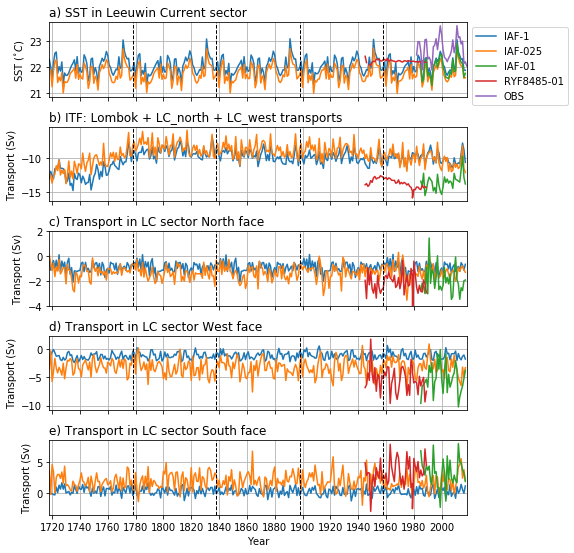

In [15]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

fig = plt.figure(1, figsize=(7.48,9.06)) 
# fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

# plt.suptitle(
#     r'SST 1993 to 2017 $\bf{linear\ trend}$ in ' +
#     '\n(a,b,c) the model and in (d) the observations',
#     x=0.2,y=1.025, ha='left')

row=5
col=1

ax = plt.subplot(row, col, 1)
plt.plot(sst_1_LC.year, sst_1_LC, label='IAF-1')
plt.plot(sst_025_LC.year, sst_025_LC, label='IAF-025')
plt.plot(sst_01_LC.year, sst_01_LC, label='IAF-01')
plt.plot(sst_JRA_LC.year, sst_JRA_LC, label='RYF8485-01')
plt.plot(sst_LC.year, sst_LC, label='OBS')
plt.grid()
plt.title('a) SST in Leeuwin Current sector', loc='left')
plt.xticks(np.arange(1720,2020,20))
plt.xlim([1718,2018])
plt.legend(bbox_to_anchor=(1.0,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('SST ($^{\circ}C$)')
plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)

ax = plt.subplot(row, col, 2)
plt.plot(trans_ITF_1.year, trans_ITF_1, label='IAF-1')
plt.plot(trans_ITF_025.year, trans_ITF_025, label='IAF-025')
plt.plot(trans_ITF_01.year, trans_ITF_01, label='IAF-01')
plt.plot(trans_ITF_JRA.year, trans_ITF_JRA, label='RYF8485-01')
plt.grid()
plt.title('b) ITF: Lombok + LC_north + LC_west transports', loc='left')
plt.xticks(np.arange(1720,2020,20))
plt.xlim([1718,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)

ax = plt.subplot(row, col, 3)
plt.plot(trans_LC_north_1.year, trans_LC_north_1, label='IAF-1')
plt.plot(trans_LC_north_025.year, trans_LC_north_025, label='IAF-025')
plt.plot(trans_LC_north_01.year, trans_LC_north_01, label='IAF-01')
plt.plot(trans_LC_north_JRA.year, trans_LC_north_JRA, label='RYF8485-01')
plt.grid()
plt.title('c) Transport in LC sector North face', loc='left')
plt.xticks(np.arange(1720,2020,20))
plt.xlim([1718,2018])
plt.ylim([-4,2])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)

ax = plt.subplot(row, col, 4)
plt.plot(trans_LC_west_1.year, trans_LC_west_1, label='IAF-1')
plt.plot(trans_LC_west_025.year, trans_LC_west_025, label='IAF-025')
plt.plot(trans_LC_west_01.year, trans_LC_west_01, label='IAF-01')
plt.plot(trans_LC_west_JRA.year, trans_LC_west_JRA, label='RYF8485-01')
plt.grid()
plt.title('d) Transport in LC sector West face', loc='left')
plt.xticks(np.arange(1720,2020,20))
plt.xlim([1718,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)

ax = plt.subplot(row, col, 5)
plt.plot(trans_LC_south_1.year, trans_LC_south_1, label='IAF-1')
plt.plot(trans_LC_south_025.year, trans_LC_south_025, label='IAF-025')
plt.plot(trans_LC_south_01.year, trans_LC_south_01, label='IAF-01')
plt.plot(trans_LC_south_JRA.year, trans_LC_south_JRA, label='RYF8485-01')
plt.grid()
plt.title('e) Transport in LC sector South face', loc='left')
plt.xticks(np.arange(1720,2020,20))
plt.xlim([1718,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
# ax.set_xticklabels('')
plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)


hspace = +0.4
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=hspace)

savefigure('timeseries_LC_all')

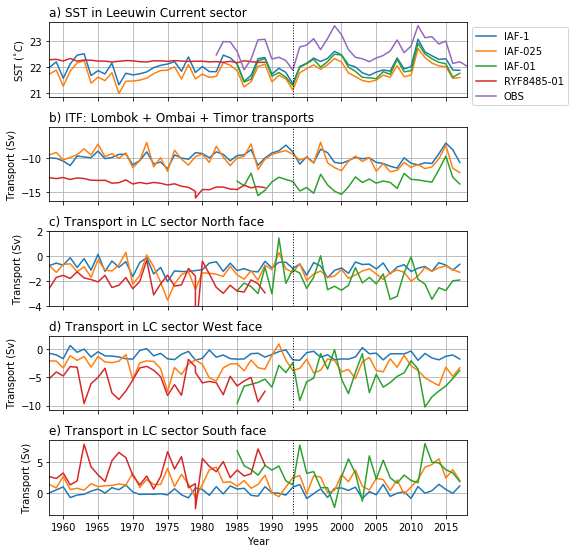

In [45]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

fig = plt.figure(1, figsize=(7.48,9.06)) 
# fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

# plt.suptitle(
#     r'SST 1993 to 2017 $\bf{linear\ trend}$ in ' +
#     '\n(a,b,c) the model and in (d) the observations',
#     x=0.2,y=1.025, ha='left')

row=5
col=1

ax = plt.subplot(row, col, 1)
plt.plot(sst_1_LC.year, sst_1_LC, label='IAF-1')
plt.plot(sst_025_LC.year, sst_025_LC, label='IAF-025')
plt.plot(sst_01_LC.year, sst_01_LC, label='IAF-01')
plt.plot(sst_JRA_LC.year, sst_JRA_LC, label='RYF8485-01')
plt.plot(sst_LC.year, sst_LC, label='OBS')
plt.grid()
plt.title('a) SST in Leeuwin Current sector', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
plt.legend(bbox_to_anchor=(1.0,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('SST ($^{\circ}C$)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)

ax = plt.subplot(row, col, 2)
plt.plot(trans_ITF_1.year, trans_ITF_1, label='IAF-1')
plt.plot(trans_ITF_025.year, trans_ITF_025, label='IAF-025')
plt.plot(trans_ITF_01.year, trans_ITF_01, label='IAF-01')
plt.plot(trans_ITF_JRA.year, trans_ITF_JRA, label='RYF8485-01')
plt.grid()
plt.title('b) ITF: Lombok + Ombai + Timor transports', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)

ax = plt.subplot(row, col, 3)
plt.plot(trans_LC_north_1.year, trans_LC_north_1, label='IAF-1')
plt.plot(trans_LC_north_025.year, trans_LC_north_025, label='IAF-025')
plt.plot(trans_LC_north_01.year, trans_LC_north_01, label='IAF-01')
plt.plot(trans_LC_north_JRA.year, trans_LC_north_JRA, label='RYF8485-01')
plt.grid()
plt.title('c) Transport in LC sector North face', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
plt.ylim([-4,2])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)

ax = plt.subplot(row, col, 4)
plt.plot(trans_LC_west_1.year, trans_LC_west_1, label='IAF-1')
plt.plot(trans_LC_west_025.year, trans_LC_west_025, label='IAF-025')
plt.plot(trans_LC_west_01.year, trans_LC_west_01, label='IAF-01')
plt.plot(trans_LC_west_JRA.year, trans_LC_west_JRA, label='RYF8485-01')
plt.grid()
plt.title('d) Transport in LC sector West face', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)

ax = plt.subplot(row, col, 5)
plt.plot(trans_LC_south_1.year, trans_LC_south_1, label='IAF-1')
plt.plot(trans_LC_south_025.year, trans_LC_south_025, label='IAF-025')
plt.plot(trans_LC_south_01.year, trans_LC_south_01, label='IAF-01')
plt.plot(trans_LC_south_JRA.year, trans_LC_south_JRA, label='RYF8485-01')
plt.grid()
plt.title('e) Transport in LC sector South face', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
# ax.set_xticklabels('')
plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)

hspace = +0.4
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=hspace)

savefigure('timeseries_LC')

In [18]:
sst_EAC = xr.open_dataset(input_path_obs + 'sst_EAC.nc').sst_EAC
print(sst_EAC)
sst_1_EAC = xr.open_dataset(input_path_mod + 'sst_1_EAC.nc').sst_1_EAC
print(sst_1_EAC)
sst_025_EAC = xr.open_dataset(input_path_mod + 'sst_025_EAC.nc').sst_025_EAC
print(sst_025_EAC)
sst_01_EAC = xr.open_dataset(input_path_mod + 'sst_01_EAC.nc').sst_01_EAC
print(sst_01_EAC)
sst_JRA_EAC = xr.open_dataset(input_path_mod + 'sst_JRA_EAC.nc').sst_JRA_EAC
print(sst_JRA_EAC)

<xarray.DataArray 'sst_EAC' (year: 37)>
array([16.307743, 15.994451, 16.007574, 16.384548, 16.26546 , 16.33474 ,
       16.619678, 16.956247, 16.637419, 16.303984, 16.233488, 16.448383,
       15.996965, 15.851464, 15.80007 , 16.4649  , 16.707935, 17.019768,
       16.779787, 17.141195, 16.803822, 16.702295, 16.317692, 16.926527,
       16.529512, 16.955814, 16.433882, 16.490053, 17.00011 , 16.756447,
       16.647795, 17.090094, 17.291588, 17.192186, 17.571009, 17.516544,
       17.136072], dtype=float32)
Coordinates:
  * year     (year) int64 1982 1983 1984 1985 1986 ... 2014 2015 2016 2017 2018
<xarray.DataArray 'sst_1_EAC' (year: 300)>
array([15.958466, 16.598175, 16.10376 , ..., 15.593475, 16.036102, 16.056915],
      dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'sst_025_EAC' (year: 300)>
array([16.075256, 16.378632, 16.029877, ..., 16.279053, 16.62909 , 16.66092 ],
      dtype=float32)
Coordinates:
 

In [19]:
trans_line_157E_1 = xr.open_dataset(input_path_mod + 'trans_line_157E_1.nc').trans_line_157E_1/1e6/1036
print(trans_line_157E_1)
trans_line_157E_025 = xr.open_dataset(input_path_mod + 'trans_line_157E_025.nc').trans_line_157E_025/1e6/1036
print(trans_line_157E_025)
trans_line_157E_01 = xr.open_dataset(input_path_mod + 'trans_line_157E_01.nc').trans_line_157E_01/1e6/1036
print(trans_line_157E_01)
trans_line_157E_JRA = xr.open_dataset(input_path_mod + 'trans_line_157E_JRA.nc').trans_line_157E_JRA/1e6/1036
print(trans_line_157E_JRA)

trans_EAC_north_1 = xr.open_dataset(input_path_mod + 'trans_EAC_north_1.nc').trans_EAC_north_1/1e6/1036
print(trans_EAC_north_1)
trans_EAC_north_025 = xr.open_dataset(input_path_mod + 'trans_EAC_north_025.nc').trans_EAC_north_025/1e6/1036
print(trans_EAC_north_025)
trans_EAC_north_01 = xr.open_dataset(input_path_mod + 'trans_EAC_north_01.nc').trans_EAC_north_01/1e6/1036
print(trans_EAC_north_01)
trans_EAC_north_JRA = xr.open_dataset(input_path_mod + 'trans_EAC_north_JRA.nc').trans_EAC_north_JRA/1e6/1036
print(trans_EAC_north_JRA)

trans_EAC_east_1 = xr.open_dataset(input_path_mod + 'trans_EAC_east_1.nc').trans_EAC_east_1/1e6/1036
print(trans_EAC_east_1)
trans_EAC_east_025 = xr.open_dataset(input_path_mod + 'trans_EAC_east_025.nc').trans_EAC_east_025/1e6/1036
print(trans_EAC_east_025)
trans_EAC_east_01 = xr.open_dataset(input_path_mod + 'trans_EAC_east_01.nc').trans_EAC_east_01/1e6/1036
print(trans_EAC_east_01)
trans_EAC_east_JRA = xr.open_dataset(input_path_mod + 'trans_EAC_east_JRA.nc').trans_EAC_east_JRA/1e6/1036
print(trans_EAC_east_JRA)

trans_EAC_south_1 = xr.open_dataset(input_path_mod + 'trans_EAC_south_1.nc').trans_EAC_south_1/1e6/1036
print(trans_EAC_south_1)
trans_EAC_south_025 = xr.open_dataset(input_path_mod + 'trans_EAC_south_025.nc').trans_EAC_south_025/1e6/1036
print(trans_EAC_south_025)
trans_EAC_south_01 = xr.open_dataset(input_path_mod + 'trans_EAC_south_01.nc').trans_EAC_south_01/1e6/1036
print(trans_EAC_south_01)
trans_EAC_south_JRA = xr.open_dataset(input_path_mod + 'trans_EAC_south_JRA.nc').trans_EAC_south_JRA/1e6/1036
print(trans_EAC_south_JRA)

trans_EAC_west_1 = xr.open_dataset(input_path_mod + 'trans_EAC_west_1.nc').trans_EAC_west_1/1e6/1036
print(trans_EAC_west_1)
trans_EAC_west_025 = xr.open_dataset(input_path_mod + 'trans_EAC_west_025.nc').trans_EAC_west_025/1e6/1036
print(trans_EAC_west_025)
trans_EAC_west_01 = xr.open_dataset(input_path_mod + 'trans_EAC_west_01.nc').trans_EAC_west_01/1e6/1036
print(trans_EAC_west_01)
trans_EAC_west_JRA = xr.open_dataset(input_path_mod + 'trans_EAC_west_JRA.nc').trans_EAC_west_JRA/1e6/1036
print(trans_EAC_west_JRA)

<xarray.DataArray 'trans_line_157E_1' (year: 300)>
array([-10.108079,  -9.294606,  -9.786257, ...,  -3.3159  ,  -4.878656,
        -3.64578 ], dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'trans_line_157E_025' (year: 300)>
array([-10.961536,  -8.700397,  -4.524485, ...,  -7.207837, -10.167994,
        -9.883975], dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'trans_line_157E_01' (year: 33)>
array([-11.847355, -13.228643, -15.628184,  -6.438509, -20.159027, -12.325154,
       -13.221691,  -0.028646,  -3.47166 ,  -7.986761,   4.786656,  -5.975379,
       -10.794724, -13.171247,  -3.842702, -28.266602,  -1.658509, -10.301574,
        -2.594747,  -4.666151,  -6.356071, -10.067216,  -4.151259,  -0.345351,
        -2.533691,  -2.350146,  -6.150349,  -4.334189, -13.612941,  -9.487581,
        -9.865787, -12.334989,  -6.078523], dtype=

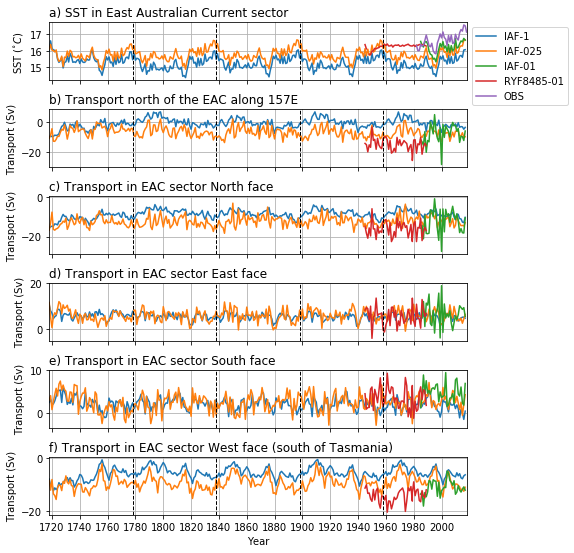

In [20]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

fig = plt.figure(1, figsize=(7.48,9.06)) 
# fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

# plt.suptitle(
#     r'SST 1993 to 2017 $\bf{linear\ trend}$ in ' +
#     '\n(a,b,c) the model and in (d) the observations',
#     x=0.2,y=1.025, ha='left')

row=6
col=1

ax = plt.subplot(row, col, 1)
plt.plot(sst_1_EAC.year, sst_1_EAC, label='IAF-1')
plt.plot(sst_025_EAC.year, sst_025_EAC, label='IAF-025')
plt.plot(sst_01_EAC.year, sst_01_EAC, label='IAF-01')
plt.plot(sst_JRA_EAC.year, sst_JRA_EAC, label='RYF8485-01')
plt.plot(sst_EAC.year, sst_EAC, label='OBS')
plt.grid()
plt.title('a) SST in East Australian Current sector', loc='left')
plt.xticks(np.arange(1720,2020,20))
plt.xlim([1718,2018])
plt.legend(bbox_to_anchor=(1.0,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('SST ($^{\circ}C$)')
plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)


ax = plt.subplot(row, col, 2)
plt.plot(trans_line_157E_1.year, trans_line_157E_1, label='IAF-1')
plt.plot(trans_line_157E_025.year, trans_line_157E_025, label='IAF-025')
plt.plot(trans_line_157E_01.year, trans_line_157E_01, label='IAF-01')
plt.plot(trans_line_157E_JRA.year, trans_line_157E_JRA, label='RYF8485-01')
plt.grid()
plt.title('b) Transport north of the EAC along 157E', loc='left')
plt.xticks(np.arange(1720,2020,20))
plt.xlim([1718,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)


ax = plt.subplot(row, col, 3)
plt.plot(trans_EAC_north_1.year, trans_EAC_north_1, label='IAF-1')
plt.plot(trans_EAC_north_025.year, trans_EAC_north_025, label='IAF-025')
plt.plot(trans_EAC_north_01.year, trans_EAC_north_01, label='IAF-01')
plt.plot(trans_EAC_north_JRA.year, trans_EAC_north_JRA, label='RYF8485-01')
plt.grid()
plt.title('c) Transport in EAC sector North face', loc='left')
plt.xticks(np.arange(1720,2020,20))
plt.xlim([1718,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)


ax = plt.subplot(row, col, 4)
plt.plot(trans_EAC_east_1.year, trans_EAC_east_1, label='IAF-1')
plt.plot(trans_EAC_east_025.year, trans_EAC_east_025, label='IAF-025')
plt.plot(trans_EAC_east_01.year, trans_EAC_east_01, label='IAF-01')
plt.plot(trans_EAC_east_JRA.year, trans_EAC_east_JRA, label='RYF8485-01')
plt.grid()
plt.title('d) Transport in EAC sector East face', loc='left')
plt.xticks(np.arange(1720,2020,20))
plt.xlim([1718,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)


ax = plt.subplot(row, col, 5)
plt.plot(trans_EAC_south_1.year, trans_EAC_south_1, label='IAF-1')
plt.plot(trans_EAC_south_025.year, trans_EAC_south_025, label='IAF-025')
plt.plot(trans_EAC_south_01.year, trans_EAC_south_01, label='IAF-01')
plt.plot(trans_EAC_south_JRA.year, trans_EAC_south_JRA, label='RYF8485-01')
plt.grid()
plt.title('e) Transport in EAC sector South face', loc='left')
plt.xticks(np.arange(1720,2020,20))
plt.xlim([1718,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)


ax = plt.subplot(row, col, 6)
plt.plot(trans_EAC_west_1.year, trans_EAC_west_1, label='IAF-1')
plt.plot(trans_EAC_west_025.year, trans_EAC_west_025, label='IAF-025')
plt.plot(trans_EAC_west_01.year, trans_EAC_west_01, label='IAF-01')
plt.plot(trans_EAC_west_JRA.year, trans_EAC_west_JRA, label='RYF8485-01')
plt.grid()
plt.title('f) Transport in EAC sector West face (south of Tasmania)', loc='left')
plt.xticks(np.arange(1720,2020,20))
plt.xlim([1718,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
# ax.set_xticklabels('')
plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)




hspace = +0.5
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=hspace)

savefigure('timeseries_EAC_all')

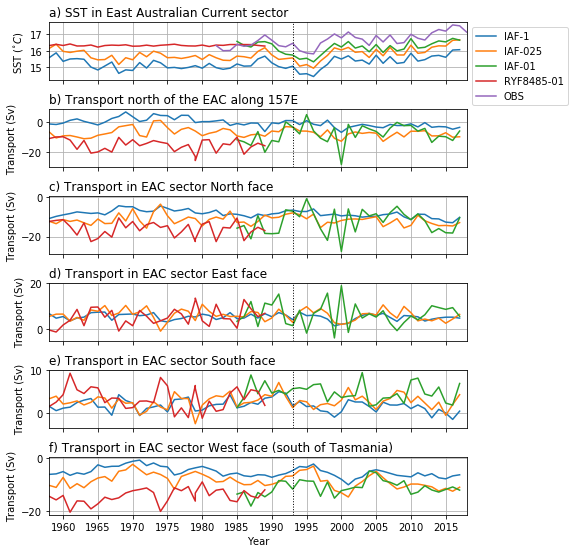

In [44]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

fig = plt.figure(1, figsize=(7.48,9.06)) 
# fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

# plt.suptitle(
#     r'SST 1993 to 2017 $\bf{linear\ trend}$ in ' +
#     '\n(a,b,c) the model and in (d) the observations',
#     x=0.2,y=1.025, ha='left')

row=6
col=1

ax = plt.subplot(row, col, 1)
plt.plot(sst_1_EAC.year, sst_1_EAC, label='IAF-1')
plt.plot(sst_025_EAC.year, sst_025_EAC, label='IAF-025')
plt.plot(sst_01_EAC.year, sst_01_EAC, label='IAF-01')
plt.plot(sst_JRA_EAC.year, sst_JRA_EAC, label='RYF8485-01')
plt.plot(sst_EAC.year, sst_EAC, label='OBS')
plt.grid()
plt.title('a) SST in East Australian Current sector', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
plt.legend(bbox_to_anchor=(1.0,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('SST ($^{\circ}C$)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)
years = np.arange(1993,2018)
slopes_1, _, _, _, _ = stats.linregress(years, sst_1_EAC.sel(year=slice(1993,2017)))
slopes_025, _, _, _, _ = stats.linregress(years, sst_025_EAC.sel(year=slice(1993,2017)))
slopes_01, _, _, _, _ = stats.linregress(years, sst_01_EAC.sel(year=slice(1993,2017)))
slopes, _, _, _, _ = stats.linregress(years, sst_EAC.sel(year=slice(1993,2017)))

ax = plt.subplot(row, col, 2)
plt.plot(trans_line_157E_1.year, trans_line_157E_1, label='IAF-1')
plt.plot(trans_line_157E_025.year, trans_line_157E_025, label='IAF-025')
plt.plot(trans_line_157E_01.year, trans_line_157E_01, label='IAF-01')
plt.plot(trans_line_157E_JRA.year, trans_line_157E_JRA, label='RYF8485-01')
plt.grid()
plt.title('b) Transport north of the EAC along 157E', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)

ax = plt.subplot(row, col, 3)
plt.plot(trans_EAC_north_1.year, trans_EAC_north_1, label='IAF-1')
plt.plot(trans_EAC_north_025.year, trans_EAC_north_025, label='IAF-025')
plt.plot(trans_EAC_north_01.year, trans_EAC_north_01, label='IAF-01')
plt.plot(trans_EAC_north_JRA.year, trans_EAC_north_JRA, label='RYF8485-01')
plt.grid()
plt.title('c) Transport in EAC sector North face', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)

ax = plt.subplot(row, col, 4)
plt.plot(trans_EAC_east_1.year, trans_EAC_east_1, label='IAF-1')
plt.plot(trans_EAC_east_025.year, trans_EAC_east_025, label='IAF-025')
plt.plot(trans_EAC_east_01.year, trans_EAC_east_01, label='IAF-01')
plt.plot(trans_EAC_east_JRA.year, trans_EAC_east_JRA, label='RYF8485-01')
plt.grid()
plt.title('d) Transport in EAC sector East face', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)

ax = plt.subplot(row, col, 5)
plt.plot(trans_EAC_south_1.year, trans_EAC_south_1, label='IAF-1')
plt.plot(trans_EAC_south_025.year, trans_EAC_south_025, label='IAF-025')
plt.plot(trans_EAC_south_01.year, trans_EAC_south_01, label='IAF-01')
plt.plot(trans_EAC_south_JRA.year, trans_EAC_south_JRA, label='RYF8485-01')
plt.grid()
plt.title('e) Transport in EAC sector South face', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)

ax = plt.subplot(row, col, 6)
plt.plot(trans_EAC_west_1.year, trans_EAC_west_1, label='IAF-1')
plt.plot(trans_EAC_west_025.year, trans_EAC_west_025, label='IAF-025')
plt.plot(trans_EAC_west_01.year, trans_EAC_west_01, label='IAF-01')
plt.plot(trans_EAC_west_JRA.year, trans_EAC_west_JRA, label='RYF8485-01')
plt.grid()
plt.title('f) Transport in EAC sector West face (south of Tasmania)', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
# ax.set_xticklabels('')
plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)


hspace = +0.5
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=hspace)

savefigure('timeseries_EAC')